In [77]:
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from collections import defaultdict

In [71]:
authors = pd.read_csv('authors_10_200_07-11-2023.tsv', sep='\t')
authors = authors.dropna()
authors.head()

,0,1,2,3
0,https://openalex.org/A1250997588,10,305,"Biology 100.0,Chemistry 100.0,Medicine 90.0,Ph..."
1,https://openalex.org/A1585957363,10,443,"Medicine 100.0,Biology 100.0,Chemistry 90.0"
2,https://openalex.org/A4350117078,11,284,"Medicine 100.0,Biology 90.9"
3,https://openalex.org/A4344866796,16,300,"Medicine 87.5,Biology 87.5,Chemistry 75.0"
4,https://openalex.org/A4348915470,12,270,"Computer science 100.0,Biology 75.0,Geography ..."


In [72]:
authors_field = defaultdict(lambda:[])
for _, author in authors.iterrows():
    fields = author[3].split(',')
    for field in fields:
        name = field.split(' ')[0]
        authors_field[name].append(author[0])

In [79]:
labels = []
y = []
for field,authors in authors_field.items():
    labels.append(field)
    y.append(len(authors))

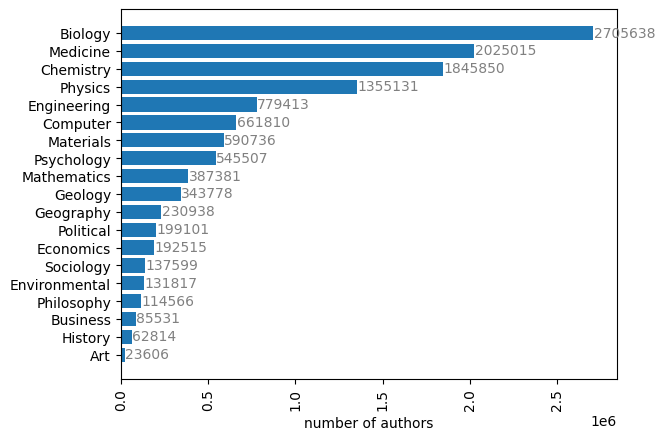

In [105]:
idxs = np.argsort(y)
labels = np.asarray(labels)
y = np.asarray(y)

labels = labels[idxs]
y = y[idxs]

plt.barh(labels, y)

ax = plt.gca()
for i, (label, count) in enumerate(zip(labels, y)):
    ax.text(count + 2000, i-0.2, "{}".format(count), color='gray', size=10)
plt.xlabel('number of authors')
plt.xticks(rotation=90)
plt.show()

In [106]:
fos = 'Sociology'

In [107]:
authors_subset = authors_field[fos]

In [145]:
import glob
import ast

authormap = defaultdict(lambda:[])

works_files = glob.glob('works_valid_07-1*-2023*.tsv')
print(works_files)
for file in works_files:
    works = pd.read_csv(file, sep='\t')
    for idx,row in works.iterrows():
        temp = ast.literal_eval(row[5])
        for author in temp:
            if author['author']['id'] in authors_subset:
                authormap[author['author']['id']].append((row[0], row[2]))
    break

['works_valid_07-17-2023-21-15.tsv', 'works_valid_07-17-2023-21-44.tsv', 'works_valid_07-17-2023-22-15.tsv', 'works_valid_07-17-2023-22-49.tsv', 'works_valid_07-17-2023-23-29.tsv', 'works_valid_07-18-2023-00-07.tsv', 'works_valid_07-18-2023-00-44.tsv', 'works_valid_07-18-2023-01-20.tsv', 'works_valid_07-18-2023-01-59.tsv', 'works_valid_07-18-2023-02-35.tsv', 'works_valid_07-18-2023-03-11.tsv', 'works_valid_07-18-2023-03-45.tsv', 'works_valid_07-18-2023-04-17.tsv', 'works_valid_07-18-2023-04-52.tsv', 'works_valid_07-18-2023-05-25.tsv', 'works_valid_07-18-2023-05-59.tsv', 'works_valid_07-18-2023-06-35.tsv', 'works_valid_07-18-2023-07-10.tsv', 'works_valid_07-18-2023-07-42.tsv', 'works_valid_07-18-2023-08-17.tsv', 'works_valid_07-18-2023-08-52.tsv', 'works_valid_07-18-2023-09-31.tsv', 'works_valid_07-18-2023-09-53.tsv']


KeyboardInterrupt: 

In [137]:
authormap

defaultdict(<function __main__.<lambda>()>, {})

In [141]:
temp[330:]

'onding": True, "raw_affiliation_strings": ["Samsung Techwin RD Center, Seongnam-si, Republic of South Korea"], "raw_affiliation_string": "Samsung Techwin RD Center, Seongnam-si, Republic of South Korea"}, {"author_position": "middle", "author": {"id": "https://openalex.org/A2143886660", "display_name": "Ravinder Venugopal", "orcid": "None"}, "institutions": [{"id": "None", "display_name": "Intellicass Inc, Montreal, Canada", "ror": "None", "country_code": "None", "type": "None"}], "is_corresponding": "False", "raw_affiliation_strings": ["Intellicass Inc, Montreal, Canada"], "raw_affiliation_string": "Intellicass Inc, Montreal, Canada"}, {"author_position": "last", "author": {"id": "https://openalex.org/A4343999909", "display_name": "A. Galip Ulsoy", "orcid": "None"}, "institutions": [{"id": "https://openalex.org/I27837315", "display_name": "University of Michigan–Ann Arbor", "ror": "https://ror.org/00jmfr291", "country_code": "US", "type": "education"}], "is_corresponding": "False", "